Churn Modelling For Bank Customer

In [45]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [46]:
df = pd.read_csv('Churn_Modelling.csv')
X = df.iloc[:,3:13]
y = df.iloc[:,13]

Data Pre-Processing

In [47]:
# creating dummy variables for goegraphy and gender (since categorical)
geography = pd.get_dummies(X["Geography"],drop_first=True)
gender = pd.get_dummies(X["Gender"],drop_first=True)

# concatinating the Data Frames
X = pd.concat([X,geography,gender],axis=1)

# Dropping Unnecessary columns
X = X.drop(['Geography','Gender'],axis=1)


In [48]:
# splitting data into traain-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Feature Scaling
(if magnitude of x1,x2,x3 is different, multiplication and backpropagation happens quickly)

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Creating the Artificial Neural Network

In [50]:
# importing libraries
import keras
from keras.models import Sequential # responsible from creating the neural network
from keras.layers import Dense  # to create hidden layers
from keras.layers import LeakyReLU,PReLU,ELU # activation functions
from keras.layers import Dropout  # regularization
import tensorflow as tf

In [51]:
# initializing the ANN
classifier = Sequential()

# adding the input layer and the first hidden layer
# he uniform works well with relu activation function
classifier.add(Dense(units = 6,kernel_initializer = 'he_uniform',activation='relu',input_dim=11))

# adding a dropout layer for regularization
classifier.add(Dropout(0.3))


# adding the second hidden layer
classifier.add(Dense(units = 6,kernel_initializer= 'he_uniform',activation='relu'))

# adding the output layer
classifier.add(Dense(units = 1,kernel_initializer= 'glorot_uniform',activation='sigmoid'))

# compiling the ANN
# using adam optimizer
# loss is binary_crossentropy since output is either 0 or 1
classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics=['accuracy'])

#classifier.summary()

# fitting the ANN to the training set
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs =100)

model_history.history.keys()

Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.6098 - accuracy: 0.7061 - val_loss: 0.4708 - val_accuracy: 0.7944
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4853 - accuracy: 0.7966 - val_loss: 0.4573 - val_accuracy: 0.7970
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4694 - accuracy: 0.8022 - val_loss: 0.4484 - val_accuracy: 0.7970
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4483 - accuracy: 0.8065 - val_loss: 0.4360 - val_accuracy: 0.8065
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4426 - accuracy: 0.8155 - val_loss: 0.4294 - val_accuracy: 0.8122
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4356 - accuracy: 0.8147 - val_loss: 0.4250 - val_accuracy: 0.8114
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4323 - accuracy: 0.8205 - val_loss: 0.4157 - val_accuracy: 0.8205

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Visualizing the Model Performace ( Accuracy vs Epochs)

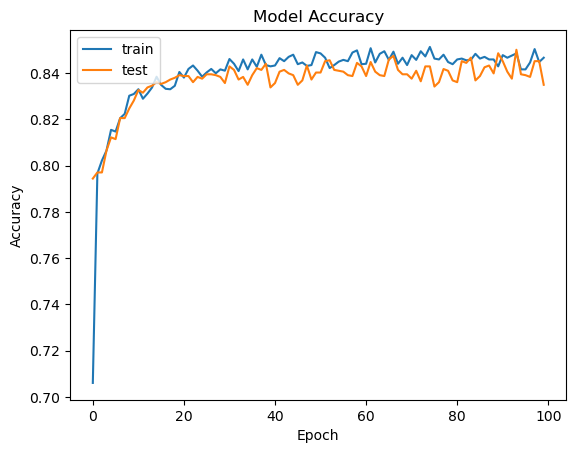

In [52]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc = 'upper left')

Making Predictions and Evaluating the Model

63/63 [==============================] - 0s 1ms/step
Accuracy Score:  0.8395


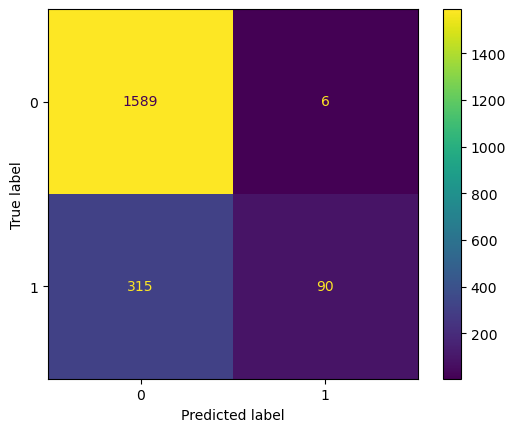

In [53]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)

# Creating the confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

# calculate the accuracy of the model
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
print("Accuracy Score: ",score)



